In [1]:
import sys
sys.path.append("../")

In [2]:
import pathlib
import torch
import torchaudio
import torch.nn.functional as F
import matplotlib.pyplot as plt
from src.bpdp import bpdp, bp, bp1

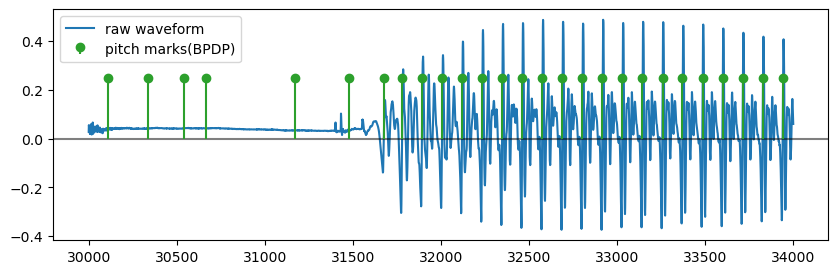

In [3]:
# ZFF as03i1
in_fp = pathlib.Path("..")/"data"/"APLAWDW"/"s"/"03"/"i"/"as03i1.wav"

wav, sr = torchaudio.load(str(in_fp))


# p = bpdp(wav.view(-1), sr=20000, fl=1000, f_lo=50.0, f_hi=750.0, beam_size=5)
# p = bpdp(wav[0].view(-1), sr, wl_0=0.1, wl_1=0.0125, f_lo=50.0, f_hi=550.0, beam_size=5)
p = bpdp(wav[0].view(-1), sr, wl_0=0.05, wl_1=0.002, f_lo=50.0, f_hi=550.0, beam_size=5, filt="bp1")

fig, ax = plt.subplots(1,1, figsize=(10,3))
t = 30000
l = 4000

_time = torch.arange(t, t+l)


#ax.plot(wav[0, t:t+10000])
ax.plot(_time, wav[0, t:t+l], label="raw waveform")
#ax.plot(_time, y1[t:t+10000]/20, label="lowpass filtered waveform" )
ax.axhline(0, color='black', alpha=0.5)

# filter the p
_p = torch.tensor([x for x in p if t < x < t + l])
_y = torch.ones_like(_p)*0.25
ax.stem(_p.numpy(), _y.numpy(), 'C2-', basefmt=" ", label="pitch marks(BPDP)")

ax.legend()
# fig.savefig("ZFF_as03i1.pdf", bbox_inches = 'tight',  pad_inches = 0.1)

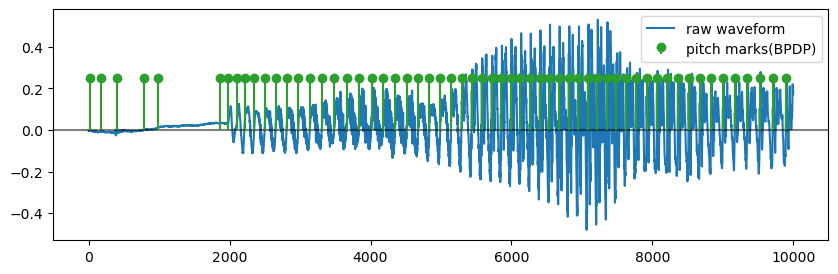

In [4]:
in_fp = pathlib.Path("../data/APLAWDW/d/00/a/ad00a0.wav")

wav, sr = torchaudio.load(str(in_fp))


#p = bpdp(wav.view(-1), sr=20000, fl=1000, f_lo=50.0, f_hi=500.0, beam_size=3)
#p = bpdp(wav[0].view(-1), sr, wl_0=0.1, wl_1=0.0125, f_lo=50.0, f_hi=550.0, beam_size=5)
p = bpdp(wav[0].view(-1), sr, wl_0=0.05, wl_1=0.0015, f_lo=50.0, f_hi=550.0, beam_size=5, filt="bp1")

fig, ax = plt.subplots(1,1, figsize=(10,3))
t = 0
l = 10000

_time = torch.arange(t, t+l)


#ax.plot(wav[0, t:t+10000])
ax.plot(_time, wav[0, t:t+l], label="raw waveform")
#ax.plot(_time, y1[t:t+10000]/20, label="lowpass filtered waveform" )
ax.axhline(0, color='black', alpha=0.5)

# filter the p
_p = torch.tensor([x for x in p if t < x < t + l])
_y = torch.ones_like(_p)*0.25
ax.stem(_p.numpy(), _y.numpy(), 'C2-', basefmt=" ", label="pitch marks(BPDP)")

ax.legend()
# fig.savefig("ZFF_as03i1.pdf", bbox_inches = 'tight',  pad_inches = 0.1)

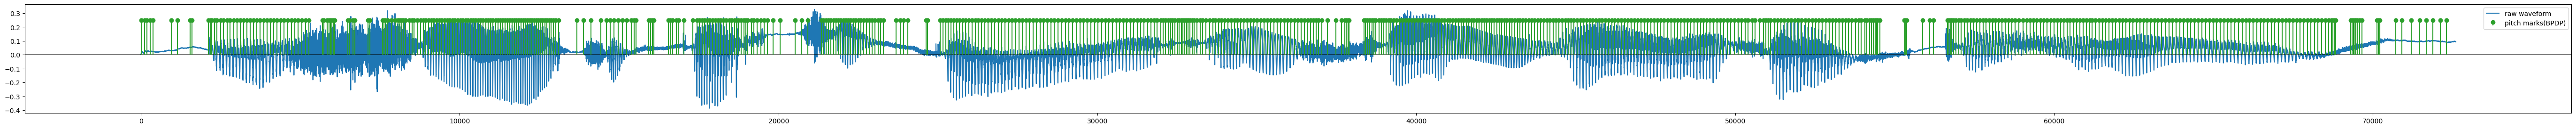

In [5]:
in_fp = pathlib.Path("../data/APLAWDW/s/04/g/as04g5.wav")

wav, sr = torchaudio.load(str(in_fp))


#p = bpdp(wav.view(-1), sr=20000, fl=1000, f_lo=50.0, f_hi=500.0, beam_size=3)
#p = bpdp(wav[0].view(-1), sr, wl_0=0.1, wl_1=0.0125, f_lo=50.0, f_hi=550.0, beam_size=5)
p = bpdp(wav[0].view(-1), sr, wl_0=0.05, wl_1=0.0015, f_lo=50.0, f_hi=550.0, beam_size=5, filt="bp1")

fig, ax = plt.subplots(1,1, figsize=(70,3))
t = 0
l = wav.shape[-1]

_time = torch.arange(t, t+l)


#ax.plot(wav[0, t:t+10000])
ax.plot(_time, wav[0, t:t+l], label="raw waveform")
#ax.plot(_time, y1[t:t+10000]/20, label="lowpass filtered waveform" )
ax.axhline(0, color='black', alpha=0.5)

# filter the p
_p = torch.tensor([x for x in p if t < x < t + l])
_y = torch.ones_like(_p)*0.25
ax.stem(_p.numpy(), _y.numpy(), 'C2-', basefmt=" ", label="pitch marks(BPDP)")

ax.legend()
# fig.savefig("ZFF_as03i1.pdf", bbox_inches = 'tight',  pad_inches = 0.1)

In [11]:
lines = open("../data/APLAWDW_wav.txt", "r").readlines()
for line in lines:
    in_fp = pathlib.Path("..")/"data"/line.strip()
    base = in_fp.stem
    out_fp = pathlib.Path("..")/"data"/"APLAWDW_WAV_BPDP5_5"/ f"{base}.wav.txt"
    
    wav, sr = torchaudio.load(str(in_fp))
    p = bpdp(wav[0].view(-1), sr, wl_0=0.05, wl_1=0.0015, f_lo=50.0, f_hi=550.0, beam_size=5, filt="bp1")

    out_fp.parent.mkdir(parents=True, exist_ok=True)
    with out_fp.open("w") as out_f:
        for p_i in p:
            out_f.write(f"{p_i}\n")

In [19]:
# 只有 band pass 下的偵測率
#h = bp(1000, sr=20000, f_lo=50.0, f_hi=500)
h = bp1(sr=20000, wl_0=0.05, wl_1=0.002)


lines = open("../data/APLAWDW_wav.txt", "r").readlines()
for line in lines:
    in_fp = pathlib.Path("..")/"data"/line.strip()
    base = in_fp.stem
    out_fp = pathlib.Path("..")/"data"/"APLAWDW_WAV_BP_3"/ f"{base}.wav.txt"
    
    wav, sr = torchaudio.load(str(in_fp))
    y = F.conv1d(wav[0].view(1, 1, -1), h.view(1, 1, -1), padding=1000//2).view(-1)[:wav[0].shape[-1]]

    # get the zero crossing points
    z = torch.zeros_like(y)
    z[1:-1] = (y[0:-2] < 0) & (y[1:-1] > 0)
    p = torch.nonzero(z).view(-1)

    out_fp.parent.mkdir(parents=True, exist_ok=True)
    with out_fp.open("w") as out_f:
        for p_i in p:
            out_f.write(f"{p_i}\n")

In [4]:
lines = open("../data/CMU_ARCTICS_SJB30.txt", "r").readlines()
for line in lines:
    in_fp = pathlib.Path("..")/"data"/line.strip()
    spk = in_fp.parent.stem
    base = in_fp.stem
    out_fp = pathlib.Path("..")/"data"/"CMU_ARCTICS_SJB30_BPDP3"/ spk /f"{base}.wav.txt"
    
    wav, sr = torchaudio.load(str(in_fp))
    #p = bpdp(wav[0].view(-1), sr, fl=1000, f_lo=50.0, f_hi=550.0, beam_size=5)
    p = bpdp(wav[0].view(-1), sr, wl_0=0.05, wl_1=0.002, f_lo=50.0, f_hi=400.0, beam_size=3, filt="bp1")

    out_fp.parent.mkdir(parents=True, exist_ok=True)
    with out_fp.open("w") as out_f:
        for p_i in p:
            out_f.write(f"{p_i}\n")

In [4]:
# 只有 band pass 下的偵測率
#h = bp(1000, sr=20000, f_lo=50.0, f_hi=500)
h = bp1(sr=32000, wl_0=0.05, wl_1=0.002)


lines = open("../data/CMU_ARCTICS_SJB30.txt", "r").readlines()
for line in lines:
    in_fp = pathlib.Path("..")/"data"/line.strip()
    spk = in_fp.parent.stem
    base = in_fp.stem
    out_fp = pathlib.Path("..")/"data"/"CMU_ARCTICS_SJB30_BP"/ spk /f"{base}.wav.txt"
    
    wav, sr = torchaudio.load(str(in_fp))
    y = F.conv1d(wav[0].view(1, 1, -1), h.view(1, 1, -1), padding=h.shape[-1]//2).view(-1)[:wav[0].shape[-1]]

    # get the zero crossing points
    z = torch.zeros_like(y)
    z[1:] += (y[:-1] < 0) & (y[1:] >= 0)
    p = torch.nonzero(z).view(-1)

    out_fp.parent.mkdir(parents=True, exist_ok=True)
    with out_fp.open("w") as out_f:
        for p_i in p:
            out_f.write(f"{p_i}\n")

In [6]:
1400 / 20000

0.07